In [104]:
import pandas as pd
import pathlib as pl
import matplotlib.pyplot as plt
data_path=pl.Path(__name__).absolute().parent.parent.joinpath("data")#.mkdir("data",exist_ok=True)
booli_path=data_path.joinpath("Booli_sold.csv")
kommun_path=data_path.joinpath("2018_R_per_kommun.csv")

#booli_path=pl.Path(__name__).parent.joinpath( "data").joinpath( "Booli_sold.csv")
booli_df=pd.read_csv(booli_path)


In [105]:
booli_df["ppsqm"]=booli_df["soldPrice"]/booli_df["livingArea"]

In [106]:
booli_df.sort_values("ppsqm", ascending=False)[:5].head()

,listPrice,rent,livingArea,rooms,published,constructionYear,objectType,booliId,soldDate,soldPrice,...,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url,ppsqm
67,1595000,1464.0,24.0,1.0,2016-01-07 14:51:06,1935.0,Lägenhet,2018259,2016-01-21,2500000,...,18.055270,NaN,Stockholm,Stockholms län,161,Notar,1566,Broker,http://www.notar.se/,104166.666667
50,1890000,1464.0,24.0,1.0,2016-06-11 08:55:51,1935.0,Lägenhet,2125576,2016-06-21,2450000,...,18.055270,NaN,Stockholm,Stockholms län,161,HusmanHagberg,1610,Broker,http://www.husmanhagberg.se/,102083.333333
54,1795000,1374.0,23.0,1.0,2016-04-15 19:10:49,1935.0,Lägenhet,2078171,2016-04-28,2300000,...,18.055422,True,Stockholm,Stockholms län,135,Notar,1566,Broker,http://www.notar.se/,100000.000000
34,1750000,1144.0,25.0,1.0,2017-05-18 16:20:57,1936.0,Lägenhet,2330886,2017-06-01,2210000,...,18.053880,NaN,Stockholm,Stockholms län,218,HusmanHagberg,1610,Broker,http://www.husmanhagberg.se/,88400.000000
55,1895000,1522.0,26.9,1.0,2016-04-01 22:56:37,1968.0,Lägenhet,2067384,2016-04-19,2300000,...,18.058529,True,Stockholm,Stockholms län,298,Notar,1566,Broker,http://www.notar.se/,85501.858736


In [107]:
avg_ppsqm=booli_df["ppsqm"].mean()
booli_df[["location.position.latitude", "location.position.longitude", "location.address.streetAddress", "ppsqm"]]

,location.position.latitude,location.position.longitude,location.address.streetAddress,ppsqm
0,59.371033,18.054057,Åminnevägen 19,52328.767123
1,59.371242,18.057821,Docentbacken 9,65416.666667
2,59.371617,18.054716,Ekhagsvägen 5,75432.098765
3,59.371480,18.053880,Torphagsvägen 4,75233.644860
4,59.372160,18.053542,Torphagsvägen 14,82758.620690
...,...,...,...,...
153,59.372272,18.055659,Ekhagsvägen 12,56730.769231
154,59.372272,18.055659,Ekhagsvägen 12,44900.000000
155,59.371194,18.053552,Åminnevägen 17,63043.478261
156,59.372759,18.054634,Torphagsvägen 18,39285.714286


In [108]:
import plotly.express as px
import pandas as pd
from copy import deepcopy as dc
df = dc(booli_df[["location.position.latitude", "location.position.longitude", "location.address.streetAddress", "ppsqm"]])

df.dropna(
    axis=0,
   how='any',
    #thresh=None,
    subset=None,
    inplace=True
)

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df, 
                        lat="location.position.latitude", 
                        lon="location.position.longitude", 
                        hover_name="location.address.streetAddress", 
                        hover_data=["location.address.streetAddress", "ppsqm"],
                        color="ppsqm",
                        color_continuous_scale=color_scale,
                        size="ppsqm",
                        zoom=8, 
                        height=800,
                        width=800)



In [109]:
fig.update_layout(title = 'World map', title_x=0.5,mapbox_style="open-street-map")#mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Kommundata

In [110]:
kommun_df=pd.read_csv(kommun_path,delimiter=";",decimal=",")
kommun_df=kommun_df[kommun_df["LÄNSKOD"]==1]

In [111]:
giltiga_röster=float(kommun_df[["RÖSTER GILTIGA"]].sum().iloc[0])

#kommun_df=kommun_df.groupby("KOMMUNNAMN")[["RÖSTER GILTIGA"]]
kommun_df[["KOMMUNNAMN","S"]].sort_values("S",ascending=False)

,KOMMUNNAMN,S
7,Botkyrka,32.34
4,Järfälla,27.68
9,Haninge,27.29
25,Nynäshamn,27.28
17,Södertälje,27.18
0,Upplands Väsby,26.97
19,Sundbyberg,26.60
23,Norrtälje,26.24
11,Upplands-Bro,26.16
6,Huddinge,26.10


In [112]:
kommun_df[["KOMMUNNAMN","VALDELTAGANDE"]].sort_values("VALDELTAGANDE",ascending=False)[:3]

,KOMMUNNAMN,VALDELTAGANDE
22,Vaxholm,92.74
5,Ekerö,92.16
14,Danderyd,91.92


# Stroke data

Text(0.5, 0, 'BMI')

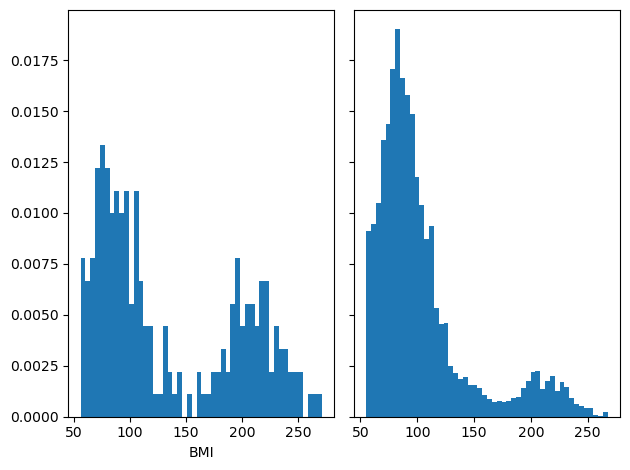

In [129]:
stroke_df=pd.read_csv(data_path.joinpath("healthcare-dataset-stroke-data.csv"))
stroke_df=stroke_df[["bmi","stroke","avg_glucose_level"]]
stroke_df.dropna(axis=0,how="any",inplace=True)
[fig,ax]=plt.subplots(nrows=1,ncols=2,sharey=True, tight_layout=True)
#fig[0]=stroke_df[stroke_df["stroke"]==1][["bmi"]].plot.hist(bins=50)
#fig[1]=stroke_df[stroke_df["stroke"]==0][["bmi"]].plot.hist(bins=50)
ax[0].hist(stroke_df[stroke_df["stroke"]==1][["avg_glucose_level"]],bins=50,density=True)
ax[1].hist(stroke_df[stroke_df["stroke"]==0][["avg_glucose_level"]],bins=50,density=True)
ax[0].set_xlabel("BMI")